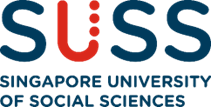

<h1 align=center><font size = 5>ANL 252 Tutor Marked Assignment (TMA) </font><h1>

Question 1b)

In [1]:
#General Libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import time
import seaborn as sns
import sys
from natsort import natsorted
sns.set()

import datetime
from datetime import datetime
from datetime import date
from datetime import timedelta

start = time.time()
%matplotlib inline

# To show that libraries and tools are successfully imported
# Program Source Ackowledgement (Referencing)
print ("Libraries imported")

print("Program Courtesy of Prof Munish Kumar")

Libraries imported
Program Courtesy of Prof Munish Kumar


In [2]:
#Import and read the Staff Data csv file
Staff_Data = pd.read_csv('TMA_Data.csv')

In [3]:
#Reads basic information about the dataset such as datatype ect.
Staff_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                250 non-null    int64  
 1   Staff             250 non-null    object 
 2   BirthYear         250 non-null    object 
 3   Gender            250 non-null    object 
 4   Marital           250 non-null    object 
 5   Citizenship       250 non-null    object 
 6   Minority          250 non-null    object 
 7   JoinDate          250 non-null    object 
 8   LeftDate          85 non-null     object 
 9   Unit              250 non-null    object 
 10  Salary            250 non-null    int64  
 11  PerformanceScore  250 non-null    object 
 12  Survey            250 non-null    float64
 13  Satisfaction      250 non-null    int64  
 14  Absence           250 non-null    int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 29.4+ KB


In [4]:
#Convert string date variables to date/datetime format.
Staff_Data['BirthYear']=pd.to_datetime(Staff_Data['BirthYear'])
Staff_Data['JoinDate']=pd.to_datetime(Staff_Data['JoinDate'])
Staff_Data['LeftDate']=pd.to_datetime(Staff_Data['LeftDate'])

#Comment the line below out if conversion has been confirmed.
Staff_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                250 non-null    int64         
 1   Staff             250 non-null    object        
 2   BirthYear         250 non-null    datetime64[ns]
 3   Gender            250 non-null    object        
 4   Marital           250 non-null    object        
 5   Citizenship       250 non-null    object        
 6   Minority          250 non-null    object        
 7   JoinDate          250 non-null    datetime64[ns]
 8   LeftDate          85 non-null     datetime64[ns]
 9   Unit              250 non-null    object        
 10  Salary            250 non-null    int64         
 11  PerformanceScore  250 non-null    object        
 12  Survey            250 non-null    float64       
 13  Satisfaction      250 non-null    int64         
 14  Absence           250 non-

In [5]:
#Add column that calculates Age from BirthYear variable.For aggregation in the Staff_Data.describe table/Linear Regression.

#The segment below is to calculate the difference between the current date and the birth date of each staff member (record).
def age(Birth):
    Birth = datetime.strptime(str(Birth), '%Y-%m-%d %H:%M:%S').date()
    today = date.today()
    return today.year - Birth.year - ((today.month, today.day) < (Birth.month, Birth.day))

#This line adds the calculations above as a new calculated column in the data frame.
Staff_Data['Age'] = Staff_Data['BirthYear'].apply(age)

Question 1b) (continued) and 1c)

In [6]:
#Add column that calculates duration of employment from JoinDate and leftDate.
#For aggregation in the Staff_Data.describe table/Linear Regression.
#For Question 1b and 1c.

#To replace Nan values in LeftDate with 1st May 2022.
Staff_Data['LeftDate'] = Staff_Data['LeftDate'].replace('',np.nan,regex = True)
Default = pd.to_datetime('2022-05-01')
Staff_Data['LeftDate'] = Staff_Data['LeftDate'].fillna(Default)

#The segment below is to calculate difference in days between updated LeftDate and the JoinDate of each staff member (record).
Staff_Data['Emptime_Days'] = (pd.to_datetime(Staff_Data['LeftDate']) - pd.to_datetime(Staff_Data['JoinDate'])).dt.days

#The segment below is to convert days into years as a unit.
Staff_Data['Emptime_Years'] = Staff_Data['Emptime_Days']/365

#The segment below is to round the years to one decimal place.
Staff_Data['Emptime_Years'] = Staff_Data['Emptime_Years'].round(1)

In [7]:
#Comment Out once updates to the data frame's time series variables have been checked.
Staff_Data

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence,Age,Emptime_Days,Emptime_Years
0,1,Aairah Hastings,1986-10-07,F,Single,Citizen,Yes,2012-04-02,2022-05-01,Manufacturing,46335,Meet,3.40,5,15,35,3681,10.1
1,2,Aaminah Mcmillan,1986-05-25,F,Married,Citizen,No,2014-05-12,2022-05-01,Manufacturing,66825,Meet,4.60,3,20,36,2911,8.0
2,3,Aamna Howell,1985-04-20,F,Single,Citizen,No,2014-09-29,2022-05-01,Manufacturing,60446,Meet,3.40,4,14,37,2771,7.6
3,4,Aayan Ferrell,1984-06-10,M,Married,Citizen,No,2016-01-05,2022-05-01,Admin,93046,Meet,4.10,4,20,38,2308,6.3
4,5,Ace Potter,1989-09-08,F,Divorced,Citizen,No,2011-07-11,2020-09-06,Manufacturing,50825,Meet,5.00,4,2,32,3345,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Zaina Parrish,1981-10-11,F,Married,Non-Resident,No,2015-02-16,2022-05-01,IT,89883,Meet,3.69,5,15,40,2631,7.2
246,247,Zane Downes,1987-10-24,M,Married,Non-Resident,No,2017-04-20,2022-05-01,IT,90100,Meet,3.40,3,14,34,1837,5.0
247,248,Zayd Farley,1970-07-09,M,Single,Non-Resident,No,2014-01-05,2022-05-01,IT,138888,Exceed,4.30,5,4,52,3038,8.3
248,249,Zoya Easton,1980-08-02,F,Single,Non-Resident,No,2012-08-13,2015-09-01,Manufacturing,50274,To Improve,2.50,3,13,42,1114,3.1


In [8]:
#Add column that converts Gender to binary values for aggregation in the Staff_Data.describe table/Linear Regression.

#Dictionary containing conversion keys.
Gender_con = {'M':1,
              'F':0}

#Attributes the binaries to the string values.
Staff_Data['Gender_int'] = Staff_Data['Gender'].map(Gender_con)

#Replaces the NaN values from mapping with 1.
Staff_Data['Gender_int']=Staff_Data['Gender_int'].fillna(1)

#Ensures data type is recognised as interger type.
Staff_Data['Gender_int'] = Staff_Data['Gender_int'].astype(int)

In [9]:
#Add column that converts Marital to integer values for aggregation in the Staff_Data.describe table/Linear Regression.

#Dictionary containing conversion keys.
Marital_con = {'Single':1,
               'Married':2,
               'Divorced':3,
               'Others':4}

#Attributes the intergers to the string values.
Staff_Data['Marital_int'] = Staff_Data['Marital'].map(Marital_con)

In [10]:
#Add column that converts Citizenship to integer values for aggregation in the Staff_Data.describe table/Linear Regression.

#Dictionary containing conversion keys.
Citizenship_con = {'Citizen':1,
                   'Non-Resident':2,
                   'PR':3}

#Attributes the intergers to the string values.
Staff_Data['Citizenship_int'] = Staff_Data['Citizenship'].map(Citizenship_con)

In [11]:
#Add column that converts Minority to binary values for aggregation in the Staff_Data.describe table/Linear Regression.

#Dictionary containing conversion keys.
Minority_con = {'Yes':1,
                'No':0}

#Attributes the binaries to the string values.
Staff_Data['Minority_int'] = Staff_Data['Minority'].map(Minority_con)

#Replaces the NaN values from mapping with 1.
Staff_Data['Minority_int'] = Staff_Data['Minority_int'].fillna(1)

#Ensures data type is recognised as interger type.
Staff_Data['Minority_int'] = Staff_Data['Minority_int'].astype(int)

In [12]:
#Add column that converts PerformanceScore to integer values for aggregation in the Staff_Data.describe table/Linear Regression.

#Dictionary containing conversion keys.
PerformanceScore_con = {'Exceed':4,
                        'Meet':3,
                        'To Improve':2,
                        'PIP':1}

#Attributes the intergers to the string values.
Staff_Data['PerformanceScore_int'] = Staff_Data['PerformanceScore'].map(PerformanceScore_con)

In [13]:
#Comment Out once updates to the data frame's newly mapped variables have been checked.
Staff_Data

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,...,Satisfaction,Absence,Age,Emptime_Days,Emptime_Years,Gender_int,Marital_int,Citizenship_int,Minority_int,PerformanceScore_int
0,1,Aairah Hastings,1986-10-07,F,Single,Citizen,Yes,2012-04-02,2022-05-01,Manufacturing,...,5,15,35,3681,10.1,0,1,1,1,3
1,2,Aaminah Mcmillan,1986-05-25,F,Married,Citizen,No,2014-05-12,2022-05-01,Manufacturing,...,3,20,36,2911,8.0,0,2,1,0,3
2,3,Aamna Howell,1985-04-20,F,Single,Citizen,No,2014-09-29,2022-05-01,Manufacturing,...,4,14,37,2771,7.6,0,1,1,0,3
3,4,Aayan Ferrell,1984-06-10,M,Married,Citizen,No,2016-01-05,2022-05-01,Admin,...,4,20,38,2308,6.3,1,2,1,0,3
4,5,Ace Potter,1989-09-08,F,Divorced,Citizen,No,2011-07-11,2020-09-06,Manufacturing,...,4,2,32,3345,9.2,0,3,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Zaina Parrish,1981-10-11,F,Married,Non-Resident,No,2015-02-16,2022-05-01,IT,...,5,15,40,2631,7.2,0,2,2,0,3
246,247,Zane Downes,1987-10-24,M,Married,Non-Resident,No,2017-04-20,2022-05-01,IT,...,3,14,34,1837,5.0,1,2,2,0,3
247,248,Zayd Farley,1970-07-09,M,Single,Non-Resident,No,2014-01-05,2022-05-01,IT,...,5,4,52,3038,8.3,1,1,2,0,4
248,249,Zoya Easton,1980-08-02,F,Single,Non-Resident,No,2012-08-13,2015-09-01,Manufacturing,...,3,13,42,1114,3.1,0,1,2,0,2


In [14]:
#Add column for Absences as string categories split into 5 bins for descriptive analysis and chart presentation.

#Groups Absence into 5 bins with each bin labled as a string type. Returns descriptive info on bins' parameters.
Absence_str=pd.cut(Staff_Data['Absence'],
                   bins=5,
                   labels = ['vlow',
                             'low',
                             'mod',
                             'high',
                             'vhigh'],
                   right=True)

#Adds a new column with the bin labels assigned to the record value.
Staff_Data['Absence_str']=Absence_str

In [15]:
#Add column for Salary split into 10 bins for easier data management, descriptive analysis and chart presentation.

#Groups Absence into 10 bins with each bin labled as a string type. Returns descriptive info on bins' parameters.
Salarylvl_int=pd.cut(Staff_Data['Salary'],
                   bins=10,labels = [1,
                                     2,
                                     3,
                                     4,
                                     5,
                                     6,
                                     7,
                                     8,
                                     9,
                                     10],
                   right=True)

#Adds a new column with the bin labels assigned to the record value.
Staff_Data['Salarylvl_int']=Salarylvl_int

In [16]:
#Comment Out once updates to the data frame's newly binned variables have been checked.
Staff_Data

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,...,Age,Emptime_Days,Emptime_Years,Gender_int,Marital_int,Citizenship_int,Minority_int,PerformanceScore_int,Absence_str,Salarylvl_int
0,1,Aairah Hastings,1986-10-07,F,Single,Citizen,Yes,2012-04-02,2022-05-01,Manufacturing,...,35,3681,10.1,0,1,1,1,3,high,1
1,2,Aaminah Mcmillan,1986-05-25,F,Married,Citizen,No,2014-05-12,2022-05-01,Manufacturing,...,36,2911,8.0,0,2,1,0,3,vhigh,2
2,3,Aamna Howell,1985-04-20,F,Single,Citizen,No,2014-09-29,2022-05-01,Manufacturing,...,37,2771,7.6,0,1,1,0,3,high,1
3,4,Aayan Ferrell,1984-06-10,M,Married,Citizen,No,2016-01-05,2022-05-01,Admin,...,38,2308,6.3,1,2,1,0,3,vhigh,3
4,5,Ace Potter,1989-09-08,F,Divorced,Citizen,No,2011-07-11,2020-09-06,Manufacturing,...,32,3345,9.2,0,3,1,0,3,vlow,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Zaina Parrish,1981-10-11,F,Married,Non-Resident,No,2015-02-16,2022-05-01,IT,...,40,2631,7.2,0,2,2,0,3,high,3
246,247,Zane Downes,1987-10-24,M,Married,Non-Resident,No,2017-04-20,2022-05-01,IT,...,34,1837,5.0,1,2,2,0,3,high,3
247,248,Zayd Farley,1970-07-09,M,Single,Non-Resident,No,2014-01-05,2022-05-01,IT,...,52,3038,8.3,1,1,2,0,4,vlow,5
248,249,Zoya Easton,1980-08-02,F,Single,Non-Resident,No,2012-08-13,2015-09-01,Manufacturing,...,42,1114,3.1,0,1,2,0,2,high,1


In [17]:
#Add column that converts Survey values from float type to interger type rounded to nearest whole number.

#Rounds Survey to nearest whole number.
Survey_int = Staff_Data["Survey"].round(0)

#Adds Survey_int as a new column.
Staff_Data['Survey_int']=Survey_int

#Converts Survey_int from float to interger.
Staff_Data.Survey_int = Staff_Data['Survey_int'].astype(int)

In [18]:
#Comment Out once updates to the data frame's rounded integer variables have been checked.
Staff_Data

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,...,Emptime_Days,Emptime_Years,Gender_int,Marital_int,Citizenship_int,Minority_int,PerformanceScore_int,Absence_str,Salarylvl_int,Survey_int
0,1,Aairah Hastings,1986-10-07,F,Single,Citizen,Yes,2012-04-02,2022-05-01,Manufacturing,...,3681,10.1,0,1,1,1,3,high,1,3
1,2,Aaminah Mcmillan,1986-05-25,F,Married,Citizen,No,2014-05-12,2022-05-01,Manufacturing,...,2911,8.0,0,2,1,0,3,vhigh,2,5
2,3,Aamna Howell,1985-04-20,F,Single,Citizen,No,2014-09-29,2022-05-01,Manufacturing,...,2771,7.6,0,1,1,0,3,high,1,3
3,4,Aayan Ferrell,1984-06-10,M,Married,Citizen,No,2016-01-05,2022-05-01,Admin,...,2308,6.3,1,2,1,0,3,vhigh,3,4
4,5,Ace Potter,1989-09-08,F,Divorced,Citizen,No,2011-07-11,2020-09-06,Manufacturing,...,3345,9.2,0,3,1,0,3,vlow,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Zaina Parrish,1981-10-11,F,Married,Non-Resident,No,2015-02-16,2022-05-01,IT,...,2631,7.2,0,2,2,0,3,high,3,4
246,247,Zane Downes,1987-10-24,M,Married,Non-Resident,No,2017-04-20,2022-05-01,IT,...,1837,5.0,1,2,2,0,3,high,3,3
247,248,Zayd Farley,1970-07-09,M,Single,Non-Resident,No,2014-01-05,2022-05-01,IT,...,3038,8.3,1,1,2,0,4,vlow,5,4
248,249,Zoya Easton,1980-08-02,F,Single,Non-Resident,No,2012-08-13,2015-09-01,Manufacturing,...,1114,3.1,0,1,2,0,2,high,1,2


In [19]:
#To view basic statistical distributions of metrics in UPDATED Staff_Data dataframe
#Comment Out once viewed or uneeded
#Staff_Data.describe()

In [20]:
#Re-order Staff_Data columns for more organised table view with each added modded column next to its original version.
variables = ['ID',
             'Staff',
             'BirthYear',
             'Age',
             'Gender',
             'Gender_int',
             'Marital',
             'Marital_int',
             'Citizenship',
             'Citizenship_int',
             'Minority',
             'Minority_int',
             'JoinDate',
             'LeftDate',
             'Emptime_Days',
             'Emptime_Years',
             'Unit',
             'Salary',
             'Salary_int',
             'PerformanceScore',
             'PerformanceScore_int',
             'Survey',
             'Survey_int',
             'Satisfaction',
             'Absence',
             'Absence_str']

In [21]:
#To review updated basic information about the dataframe including the order of columns.
Staff_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    250 non-null    int64         
 1   Staff                 250 non-null    object        
 2   BirthYear             250 non-null    datetime64[ns]
 3   Gender                250 non-null    object        
 4   Marital               250 non-null    object        
 5   Citizenship           250 non-null    object        
 6   Minority              250 non-null    object        
 7   JoinDate              250 non-null    datetime64[ns]
 8   LeftDate              250 non-null    datetime64[ns]
 9   Unit                  250 non-null    object        
 10  Salary                250 non-null    int64         
 11  PerformanceScore      250 non-null    object        
 12  Survey                250 non-null    float64       
 13  Satisfaction        

In [22]:
#To define which variables to consider in linear regression analysis. 

#Removes all non-numeric or redundant variables from the linear regression dataframe.
LinReg_df = Staff_Data.drop(['ID',
                             'Staff',
                             'BirthYear',
                             'Gender',
                             'Marital',
                             'Citizenship',
                             'Minority',
                             'JoinDate',
                             'LeftDate',
                             'Unit',
                             'PerformanceScore',
                             'Survey_int',
                             'Absence_str',
                             'Salarylvl_int',
                            'Emptime_Days']
                            ,axis=1)
#Comment out when linear regression dataframe has been validated for use.
LinReg_df

,Salary,Survey,Satisfaction,Absence,Age,Emptime_Years,Gender_int,Marital_int,Citizenship_int,Minority_int,PerformanceScore_int
0,46335,3.40,5,15,35,10.1,0,1,1,1,3
1,66825,4.60,3,20,36,8.0,0,2,1,0,3
2,60446,3.40,4,14,37,7.6,0,1,1,0,3
3,93046,4.10,4,20,38,6.3,1,2,1,0,3
4,50825,5.00,4,2,32,9.2,0,3,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
245,89883,3.69,5,15,40,7.2,0,2,2,0,3
246,90100,3.40,3,14,34,5.0,1,2,2,0,3
247,138888,4.30,5,4,52,8.3,1,1,2,0,4
248,50274,2.50,3,13,42,3.1,0,1,2,0,2


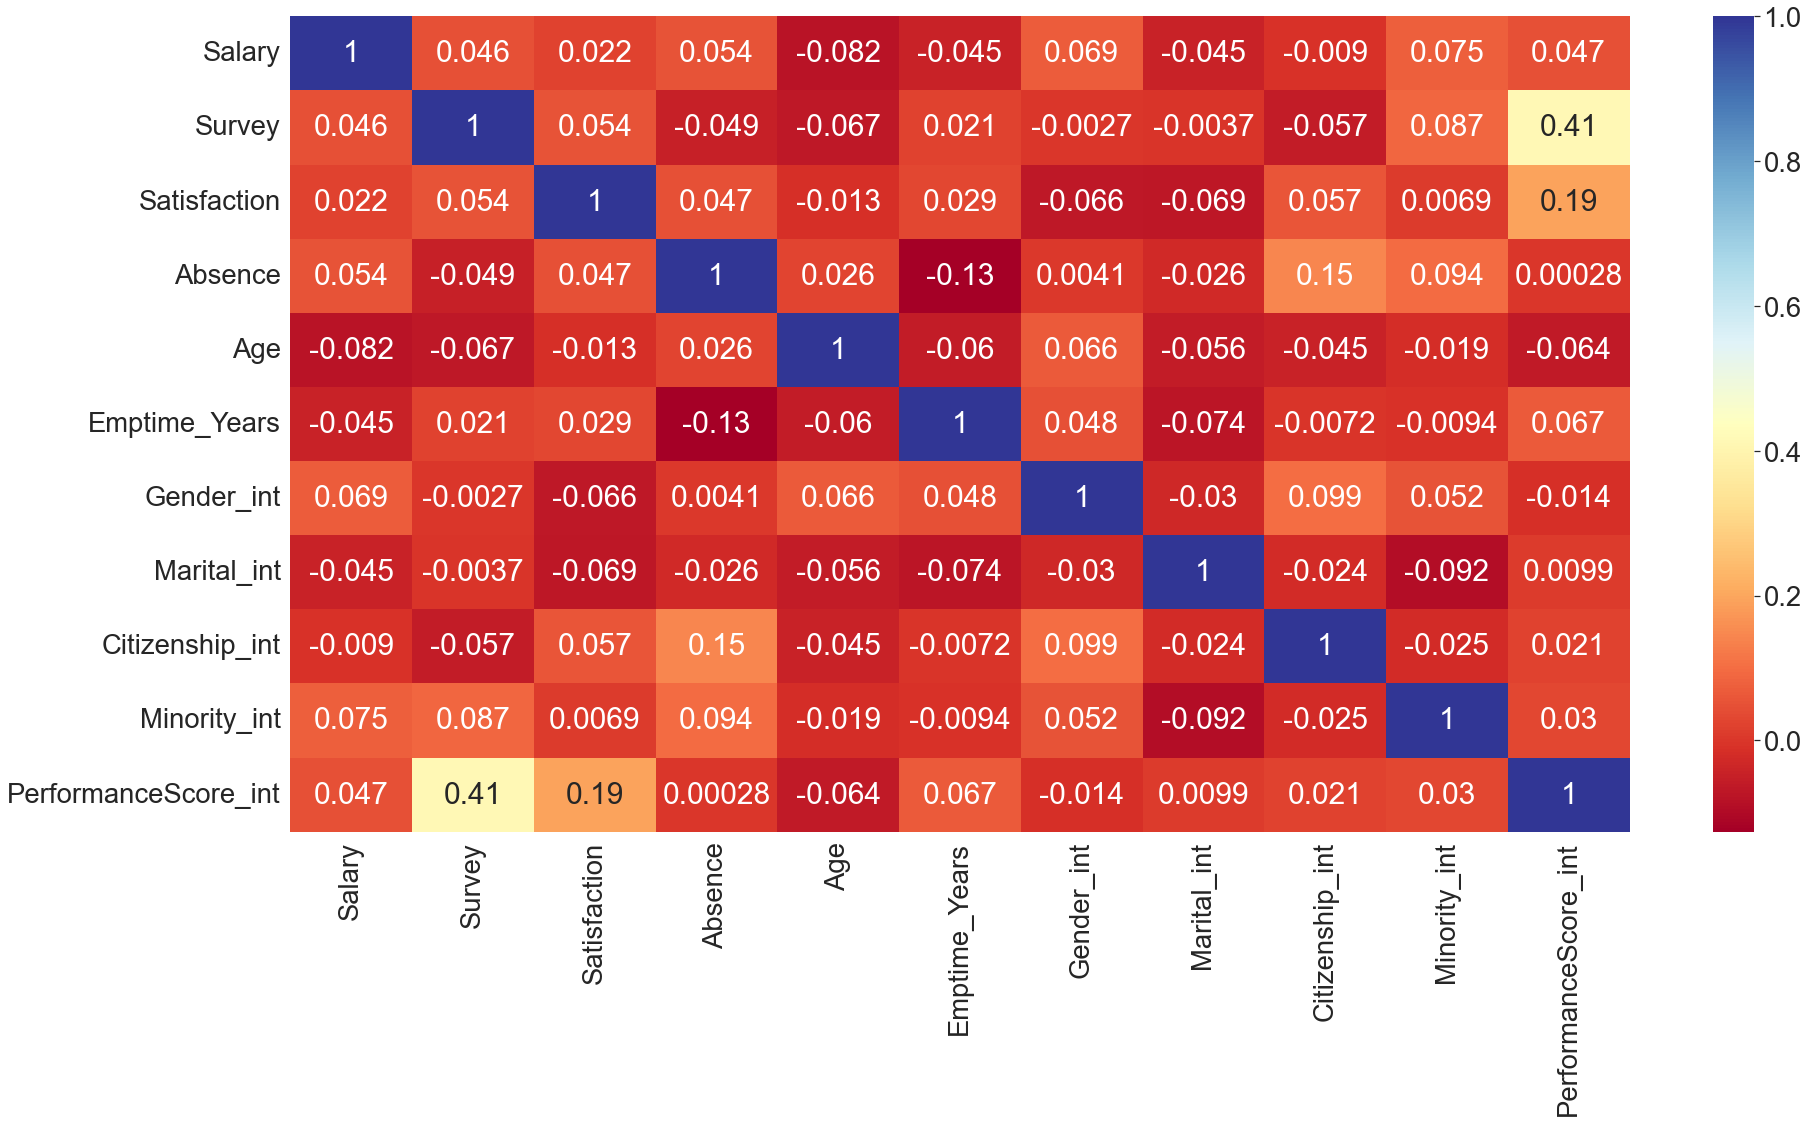

In [23]:
#Plots a heatmap to compare variables based on correlation coefficient. 
#Allows identification of variables with relatively stronger direct or inverse relationships based on gradient of cell colour
#Each cell holds the coefficient value describing the relationship of the row and column variables assigned to it

#Controls dimensions of the visual
plt.figure(figsize=(30,15))
sns.set(font_scale=2.5);

#Determines the analysis to be used in the chart type as linear regression analysis of correlation co-efficients.
Correlations = LinReg_df.corr()

#Controls the parameters of the chart in terms of its aesthetics and labels displayed.
Res = sns.heatmap(Correlations, annot=True, cmap=plt.cm.RdYlBu)

In [24]:
#To assign what is the target and explainatory variables. In this case PerformanceScore_int is the target variable.
Explainatory = LinReg_df.drop('PerformanceScore_int',1)
Target = LinReg_df['PerformanceScore_int']

C:\Users\Woolygore\AppData\Local\Temp\ipykernel_10532\1693337548.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Explainatory = LinReg_df.drop('PerformanceScore_int',1)


In [25]:
#To identify only the positive correlations with PerformanceScore_int

#Measures the magnitude of the correlation coefficients.
Target_Correlations = Correlations['PerformanceScore_int']

#Out of all the positive correlations choose those larger than 0.1 given that most are smaller than 0.1.
Positive_corr = Target_Correlations[Target_Correlations > (0.1)]
Positive_corr

Survey                  0.413548
Satisfaction            0.191755
PerformanceScore_int    1.000000
Name: PerformanceScore_int, dtype: float64

In [26]:
#To identify only the negative correlations with PerformanceScore_int

Pos_Target_Correlations = Correlations['PerformanceScore_int']

#Out of all the negative correlations choose those larger than 0.1 given that most are smaller than 0.1.
Negative_corr = Target_Correlations[Target_Correlations < 0]
Negative_corr

Age          -0.063728
Gender_int   -0.014123
Name: PerformanceScore_int, dtype: float64

In [27]:
#To create the frequency table for PerformanceScore vs Survey_int.
Perf_v_Surv=pd.crosstab(index=Staff_Data['PerformanceScore'], columns=Staff_Data['Survey_int'])
Perf_v_Surv

Survey_int,2,3,4,5
PerformanceScore,,,,
Exceed,0,0,16,14
Meet,0,32,99,70
PIP,0,2,0,0
To Improve,9,1,6,1


<AxesSubplot:xlabel='PerformanceScore'>

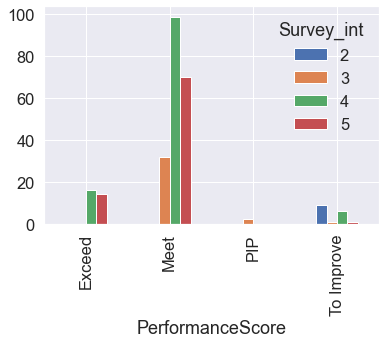

In [28]:
#To create a clustered bar chart for Perf_v_Surv frequency table.

#Chart style
plt.style.use('seaborn-whitegrid')

#Font size for all tick labels.
sns.set(font_scale=1.5)

#Display chosen chart type.
Perf_v_Surv.plot.bar()

In [29]:
#To create the frequency table for PerformanceScore vs Satisfaction.
Perf_v_Sati=pd.crosstab(index=Staff_Data['PerformanceScore'], columns=Staff_Data['Satisfaction'])
Perf_v_Sati

Satisfaction,1,2,3,4,5
PerformanceScore,,,,,
Exceed,0,0,9,9,12
Meet,0,1,69,66,65
PIP,1,1,0,0,0
To Improve,0,2,6,5,4


<AxesSubplot:xlabel='PerformanceScore'>

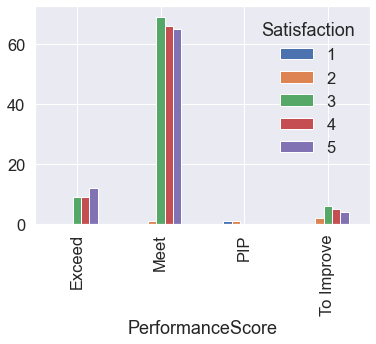

In [30]:
#To create a clustered bar chart for Perf_v_Sati frequency table.

#Chart style
plt.style.use('seaborn-whitegrid')

#Font size for all tick labels.
sns.set(font_scale=1.5)

#Display chosen chart type.
Perf_v_Sati.plot.bar()

Question 1d)

In [ ]:
#To make identification and typing more convinient.
Staff_Name = Staff_Data['Staff']
txt = input(f'Please type the full name of staff member you are looking for:')

#Inital Question with logic based on user input outcome.
if Staff_Name.isin([txt]).any()==True:
    txt_T = input(f'Match Found. Type in another name to continue:')
elif Staff_Name.isin([txt]).any()==False:
    txt_F = input(f'Please type the full name of staff member you are looking for again:')

#Attempt at making a loop that persists in repeating the first decision split based on user input to new questions
while Staff_Name.isin([txt_T]).any()==True:
    txt_T = input(f'Match Found. Type in another name to continue:')
else: 
    txt_F = input(f'Please type the full name of staff member you are looking for again:')